In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
cosmeticsisms_sales_2024 = pd.read_csv("ListingsSalesReport-Sep-29-2024-11_26_33-0700-11185979629.xlsx - Sheet1.csv", skiprows=10)
deal_avenues_sales_2024 = pd.read_csv("ListingsSalesReport-Sep-29-2024-11_11_18-0700-13184833194.xlsx - Sheet1.csv", skiprows=10)
cosmeticsisms_sales_2024 = cosmeticsisms_sales_2024.iloc[:-1]  # Use iloc to exclude the last row
deal_avenues_sales_2024 = deal_avenues_sales_2024.iloc[:-1]  # Use iloc to exclude the last row


# Check for missing values
print("Missing values in Cosmeticsisms dataset:")
print(cosmeticsisms_sales_2024.isnull().sum())
print("\nMissing values in Deal Avenues dataset:")
print(deal_avenues_sales_2024.isnull().sum())

# Drop columns with a high percentage of missing values (e.g., more than 50%)
cosmeticsisms_sales_2024_cleaned = cosmeticsisms_sales_2024.dropna(thresh=len(cosmeticsisms_sales_2024) * 0.5, axis=1)
deal_avenues_sales_2024_cleaned = deal_avenues_sales_2024.dropna(thresh=len(deal_avenues_sales_2024) * 0.5, axis=1)

# Make a copy of the original DataFrame
cosmeticsisms_sales_2024_cleaned = cosmeticsisms_sales_2024.copy()

# Fill missing values in numeric columns with the median
numeric_cols = cosmeticsisms_sales_2024_cleaned.select_dtypes(include=['float64', 'int64']).columns
cosmeticsisms_sales_2024_cleaned[numeric_cols] = cosmeticsisms_sales_2024_cleaned[numeric_cols].fillna(cosmeticsisms_sales_2024_cleaned[numeric_cols].median())

# Fill missing values in non-numeric (object) columns with an appropriate value (e.g., empty string)
non_numeric_cols = cosmeticsisms_sales_2024_cleaned.select_dtypes(include=['object']).columns
cosmeticsisms_sales_2024_cleaned[non_numeric_cols] = cosmeticsisms_sales_2024_cleaned[non_numeric_cols].fillna('')

# Now do the same for `deal_avenues` (assuming it has a similar structure)
deal_avenues_cleaned = deal_avenues_sales_2024.copy()

# Fill missing values in numeric columns with the median
numeric_cols_deal = deal_avenues_cleaned.select_dtypes(include=['float64', 'int64']).columns
deal_avenues_cleaned[numeric_cols_deal] = deal_avenues_cleaned[numeric_cols_deal].fillna(deal_avenues_cleaned[numeric_cols_deal].median())

# Fill missing values in non-numeric (object) columns with an appropriate value (e.g., empty string)
non_numeric_cols_deal = deal_avenues_cleaned.select_dtypes(include=['object']).columns
deal_avenues_cleaned[non_numeric_cols_deal] = deal_avenues_cleaned[non_numeric_cols_deal].fillna('')

# Remove any duplicate rows
cosmeticsisms_sales_2024_cleaned.drop_duplicates(inplace=True)
deal_avenues_sales_2024_cleaned.drop_duplicates(inplace=True)

def detect_outliers(df, column):
    # Convert the column to float, removing any non-numeric characters if necessary
    df[column] = df[column].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    # Calculate the first (Q1) and third (Q3) quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Return rows that are considered outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in the Quantity sold column
cosmetics_outliers = detect_outliers(cosmeticsisms_sales_2024_cleaned, 'Net sales (Net of taxes and selling costs)')
deal_avenues_outliers = detect_outliers(deal_avenues_sales_2024_cleaned, 'Net sales (Net of taxes and selling costs)')

# Print outliers if any are detected
print("Cosmeticsisms outliers:")
print(cosmetics_outliers.loc[:, ['Listing title', 'Net sales (Net of taxes and selling costs)']])
print("\nDeal Avenues outliers:")
print(deal_avenues_outliers.loc[:, ['Listing title', 'Net sales (Net of taxes and selling costs)']])

# Optionally, we can choose to remove these outliers, or just analyze them
#cosmeticsisms_sales_2024_cleaned = cosmeticsisms_sales_2024_cleaned[~cosmeticsisms_sales_2024_cleaned.index.isin(cosmetics_outliers.index)]
#deal_avenues_sales_2024_cleaned = deal_avenues_sales_2024_cleaned[~deal_avenues_sales_2024_cleaned.index.isin(deal_avenues_outliers.index)]

# Check the shape after cleaning
print("\nShape of cleaned Cosmeticsisms dataset:", cosmeticsisms_sales_2024_cleaned.shape)
print("Shape of cleaned Deal Avenues dataset:", deal_avenues_sales_2024_cleaned.shape)




Missing values in Cosmeticsisms dataset:
Listing title                                                            0
eBay item ID                                                             0
Store category L1                                                        0
Store category L2                                                        0
Quantity sold                                                            0
Total sales (Includes taxes)                                             0
Item sales                                                               0
Taxes and government fees paid by buyer to you                           0
Taxes and government fees paid by buyer to eBay                          0
Shipping and handling paid by buyer to you                               0
Total selling costs                                                      0
Insertion fees                                                           0
Optional listing upgrade fees                              

In [27]:
# Quick data preview
print("\nPreview of cleaned Cosmeticsisms dataset:")
print(cosmeticsisms_sales_2024_cleaned.head())
print("\nPreview of cleaned Deal Avenues dataset:")
print(deal_avenues_sales_2024_cleaned.head())


Preview of cleaned Cosmeticsisms dataset:
                                       Listing title  eBay item ID  \
0  MARY KAY 3D TIMEWISE AGE MINIMIZE~YOU CHOOSE~S...  3.644993e+11   
1  AFNAN 9AM DIVE EAU DE PARFUM SPRAY UNISEX 3.4 ...  3.645285e+11   
2                               Item ID 364513499614  3.645135e+11   
3  Tracfone Orbic Journey V (2) + 1 Year of Servi...  3.646120e+11   
4  Essence de Beaute Collagen & Vitamin E Face an...  3.644993e+11   

  Store category L1 Store category L2  Quantity sold  \
0             Other                 -             16   
1             Other                 -             12   
2             Other                 -              7   
3             Other                 -              7   
4             Other                 -              5   

  Total sales (Includes taxes) Item sales  \
0                      $640.39    $598.69   
1                      $373.03    $352.44   
2                      $259.98    $258.47   
3                  

In [18]:
print(cosmeticsisms_sales_2024_cleaned.columns)

Index(['Listing title', 'eBay item ID', 'Store category L1',
       'Store category L2', 'Quantity sold', 'Total sales (Includes taxes)',
       'Item sales', 'Taxes and government fees paid by buyer to you',
       'Taxes and government fees paid by buyer to eBay',
       'Shipping and handling paid by buyer to you', 'Total selling costs',
       'Insertion fees', 'Optional listing upgrade fees', 'Final value fees',
       'Promoted Listings - General fees', 'Promoted Listings - Priority fees',
       'Ads Express fees', 'Promoted Offsite - Fees', 'International fees',
       'Other eBay fees', 'Deposit processing fees', 'Fee credits',
       'Shipping labels cost (Amount you paid to buy shipping labels on eBay)',
       'Net sales (Net of taxes and selling costs)', 'Average Selling price',
       'Quantity sold via promoted listing', 'Quantity sold via Best Offers',
       'Quantity sold via Seller Initiated Offers'],
      dtype='object')



--- Cosmeticsisms Sales 2024 ---

       eBay item ID  Quantity sold  Total sales (Includes taxes)  Item sales  \
count  1.150000e+02     115.000000                    115.000000  115.000000   
mean   3.646744e+11       1.686957                     78.718087   73.640087   
std    1.168413e+08       1.992817                    101.310321   94.771019   
min    3.644992e+11       1.000000                      0.000000    0.000000   
25%    3.646120e+11       1.000000                     25.810000   24.145000   
50%    3.646414e+11       1.000000                     38.050000   35.310000   
75%    3.647906e+11       1.500000                     89.380000   82.175000   
max    3.648245e+11      16.000000                    640.390000  598.690000   

       Net sales (Net of taxes and selling costs)  Average Selling price  \
count                                  115.000000             115.000000   
mean                                    57.432348              47.711826   
std             

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


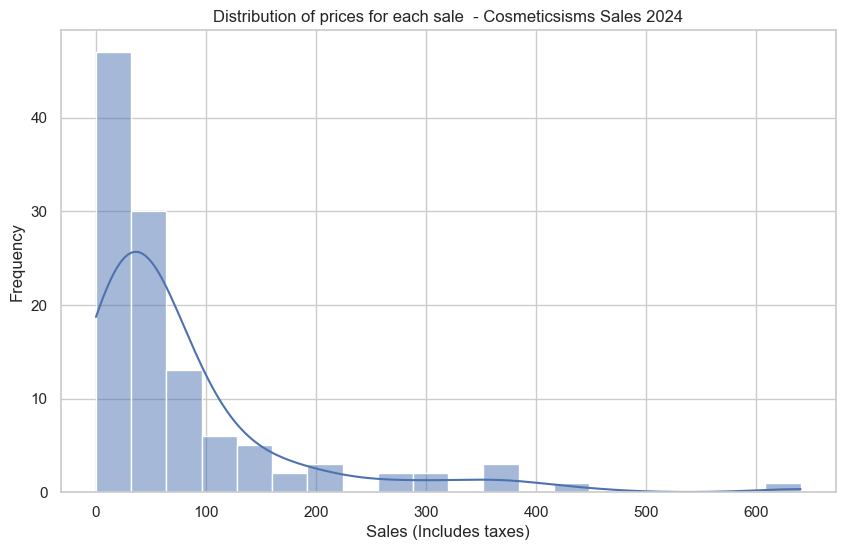


--- Deal Avenues Sales 2024 ---

       eBay item ID  Quantity sold  Total sales (Includes taxes)   Item sales  \
count  4.800000e+02     480.000000                    480.000000   480.000000   
mean   1.962081e+11       1.881250                     87.551729    83.253563   
std    6.145128e+07       1.672716                    221.920517   206.696577   
min    1.961030e+11       1.000000                      0.000000     0.000000   
25%    1.961692e+11       1.000000                     22.065000    21.102500   
50%    1.961838e+11       1.000000                     39.205000    37.445000   
75%    1.962824e+11       2.000000                     77.857500    75.497500   
max    1.963340e+11      17.000000                   3856.420000  3562.510000   

       Net sales (Net of taxes and selling costs)  Average Selling price  \
count                                   480.00000             480.000000   
mean                                     65.91600              62.540250   
std     

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


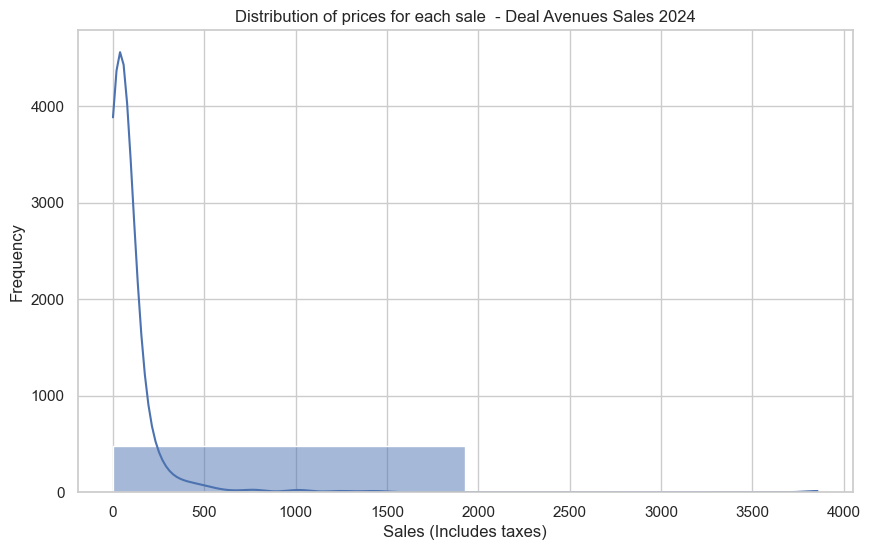

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Exploratory Data Analysis (EDA)
def eda(df, title, bins):
    print(f"\n--- {title} ---\n")
    print(df.describe())

    # Display the Listing titles and their corresponding Net sales
    print("\nSample Listings and Net Sales:\n", df[['Listing title', 'Net sales (Net of taxes and selling costs)']].head())

    # Visualize the distribution of total sales
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Total sales (Includes taxes)'], bins=bins, kde=True)
    plt.title(f"Distribution of prices for each sale  - {title}")
    plt.xlabel("Sales (Includes taxes)")
    plt.ylabel("Frequency")
    plt.show()


# Run EDA for both datasets
eda(cosmeticsisms_sales_2024_cleaned, "Cosmeticsisms Sales 2024", bins=20)
eda(deal_avenues_sales_2024_cleaned, "Deal Avenues Sales 2024", bins=2)


In [38]:
# Step 3: Key Metrics and Insights
def key_metrics(df, title):
    total_sales = df['Total sales (Includes taxes)'].sum()
    avg_sales_price = df['Average Selling price'].mean()
    total_quantity = df['Quantity sold'].sum()
    promoted_sales = df['Quantity sold via promoted listing'].sum()

    print(f"\nKey Metrics for {title}:")
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Average Selling Price: ${avg_sales_price:,.2f}")
    print(f"Total Quantity Sold: {total_quantity}")
    print(f"Quantity Sold via Promoted Listings: {promoted_sales}")

key_metrics(cosmeticsisms_sales_2024_cleaned, "Cosmeticsisms Sales 2024")
key_metrics(deal_avenues_sales_2024_cleaned, "Deal Avenues Sales 2024")



Key Metrics for Cosmeticsisms Sales 2024:
Total Sales: $9,052.58
Average Selling Price: $47.71
Total Quantity Sold: 194.0
Quantity Sold via Promoted Listings: 151

Key Metrics for Deal Avenues Sales 2024:
Total Sales: $42,024.83
Average Selling Price: $62.54
Total Quantity Sold: 903.0
Quantity Sold via Promoted Listings: 674


In [39]:
cosmeticsisms_sales_2024_cleaned.to_csv("cosmeticsisms_sales_2024_cleaned.csv")
deal_avenues_sales_2024_cleaned.to_csv("deal_avenues_sales_2024_cleaned.csv")
